# **LOAN APPROVAL PREDICTION MODEL**

**Name:**    NISHANA  aSGAR

**Organization:** Entri Elevate

**Date:** 16/08/2024

# **Overview of Problem Statement**


Develop a machine learning model to predict whether a loan application should be approved or denied based on historical data.[link text](https://github.com/NishanaAsgar/Project/blob/main/loan_approval_dataset.csv)

Dataset is a classification model,The model will classify loan applications into two categories: approved or denied.The model should output a probability score for approval and a final classification (approved/denied).

Establish Metrics for Success:

*   Accuracy: The proportion of correctly classified loan applications(both
    approvals and denials) out of the total applications.

*  Precision: The proportion of correctly approved loans out of all loans the
   model predicted as approved. High precision means fewer false positives.

*   Recall: The proportion of actual approved loans that the model correctly
    predicted. High recall means fewer false negatives.

*  Recall: The proportion of actual approved loans that the model correctly
   predicted. High recall means fewer false negatives.

*   F1 Score: The harmonic mean of precision and recall, useful when there is a
    trade-off between precision and recall.

*   Area Under the ROC Curve (AUC-ROC): Measures the model’s ability to
    distinguish between approved and denied loans.

*   Confusion Matrix: Provides detailed insights into true positives, true
    negatives, false positives, and false negatives.








# **Objective**

The objective of a loan approval prediction model is to assess and predict whether a loan application should be approved or denied based on various features and data points related to the applicant.

This involves:

1.Risk Assessment: Evaluating the likelihood that the applicant will default on the loan. This involves analyzing credit history, income levels, employment status, and other relevant financial indicators.

2.Decision Making: Helping financial institutions make informed and efficient decisions by automating and optimizing the approval process. This reduces manual effort and potential biases in decision-making.

3.Improving Accuracy: Enhancing the accuracy of loan approvals by using data-driven insights and machine learning algorithms. This helps in identifying patterns and correlations that might not be apparent through traditional methods.

4.Reducing Defaults: Minimizing the risk of financial loss by identifying high-risk applicants before the loan is granted.

5.Efficiency: Streamlining the loan approval process to speed up decision-making and improve customer experience.

# **Data Description**

Source: kaggle.com

In [96]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/NishanaAsgar/Project/main/loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# **Exploratory Data Analysis (EDA)**

## **Data Exploration**

In [97]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [99]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


## **Data Cleaning**

In [100]:
df = df.dropna()

In [101]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
4264,False
4265,False
4266,False
4267,False


In [102]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


## **Visualize Data**

**1. Histogram**

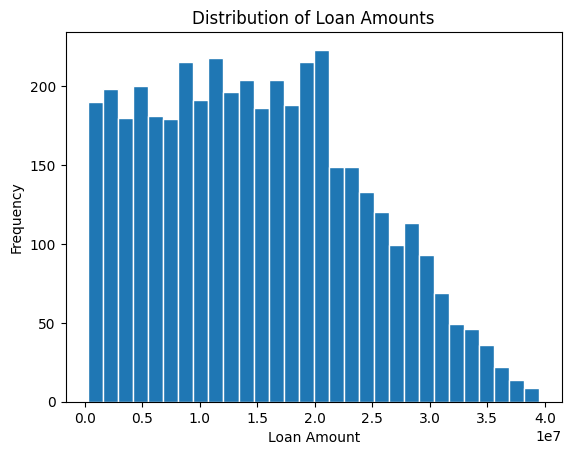

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(df[' loan_amount'], bins=30, edgecolor='w')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

**2.Boxplot**

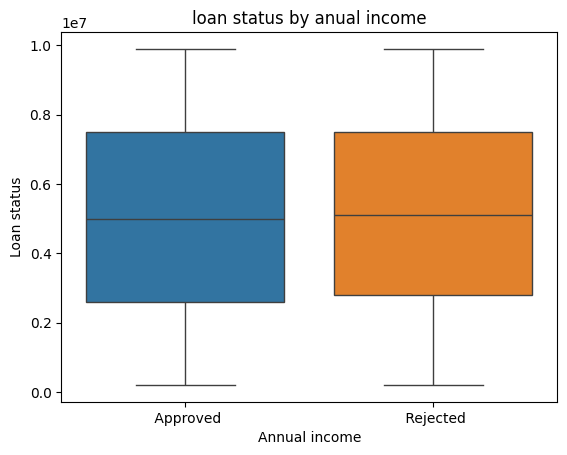

In [7]:
sns.boxplot(x=' loan_status', y=' income_annum',hue=' loan_status', data=df)
plt.title('loan status by anual income')
plt.xlabel('Annual income')
plt.ylabel('Loan status')
plt.show()

**3.Pair Plot**

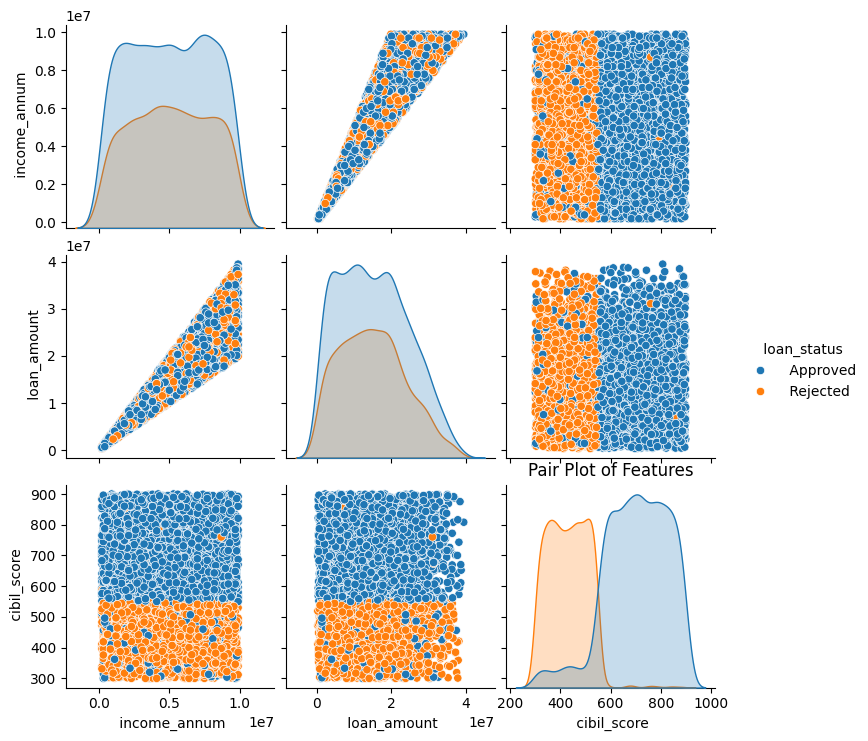

In [8]:
sns.pairplot(df[[' income_annum', ' loan_amount',' cibil_score', ' loan_status']], hue=' loan_status')
plt.title('Pair Plot of Features')
plt.show()

**4.Heatmap Correlation**

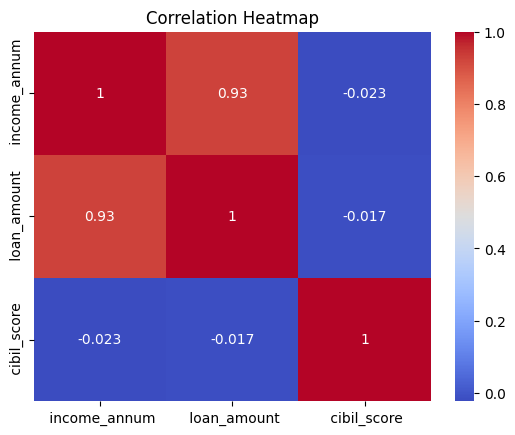

In [9]:
corr_matrix = df[[' income_annum', ' loan_amount', ' cibil_score']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**5.Pie Diagram**

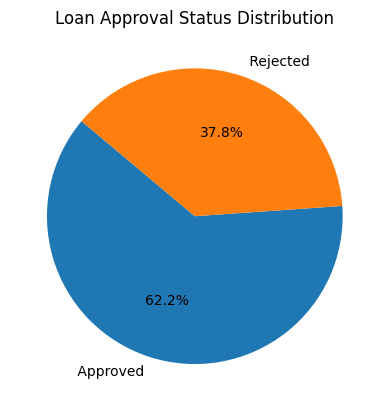

In [10]:
approval_counts = df[' loan_status'].value_counts()
plt.pie(approval_counts, labels=approval_counts.index,autopct='%1.1f%%', startangle=140)
plt.title('Loan Approval Status Distribution')
plt.show()

**6.barplot**

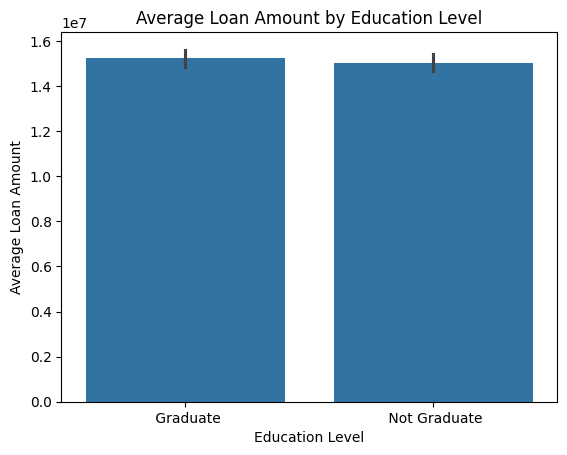

In [11]:
sns.barplot(x=' education', y=' loan_amount', data=df)
plt.title('Average Loan Amount by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Loan Amount')
plt.show()

**7.count plot**

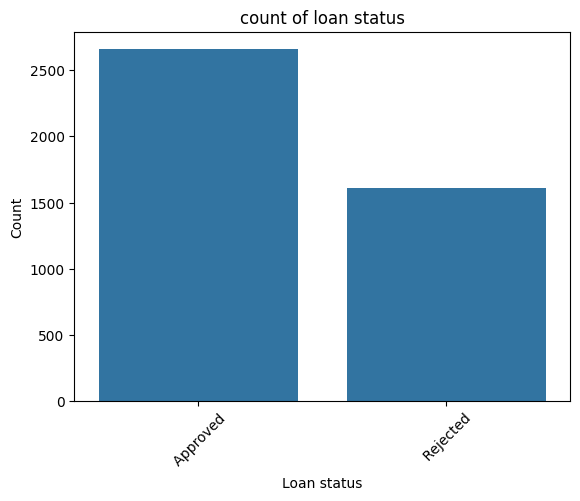

In [12]:
sns.countplot(x=' loan_status', data=df)
plt.title("count of loan status")
plt.xlabel('Loan status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**8. Kernel Density Estimation (KDE)**

<ipython-input-13-c32870eae5b7>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[' cibil_score'], shade=True)


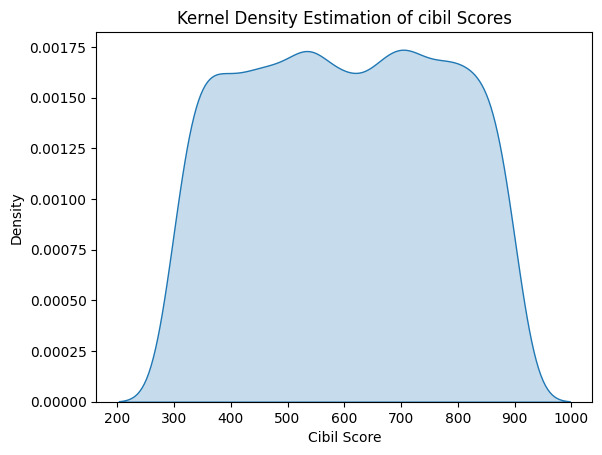

In [13]:
sns.kdeplot(df[' cibil_score'], shade=True)
plt.title('Kernel Density Estimation of cibil Scores')
plt.xlabel('Cibil Score')
plt.ylabel('Density')
plt.show()

## **Feature Engineering**

In [103]:
#Rename column
df=df.rename(columns={'loan_id': 'loan_id', ' no_of_dependents': 'no_of_dependents',' education':'education',
                      ' self_employed': 'self_employed',' income_annum': 'annum_income',' loan_amount': 'loan_amount',
                      ' loan_term':'loan_term',' cibil_score': 'cibil_score',
                      ' residential_assets_value': 'residential_assets_value',
                      ' commercial_assets_value': 'commercial_assets_value',
                      ' luxury_assets_value': 'luxury_assets_value',
                      ' bank_asset_value': 'bank_asset_value',' loan_status': 'loan_status',})
df

,loan_id,no_of_dependents,education,self_employed,annum_income,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [104]:
#convert categorical variables
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['education']=le.fit_transform(df['education'])
df['self_employed']=le.fit_transform(df['self_employed'])
df['loan_status']=le.fit_transform(df['loan_status'])
df

,loan_id,no_of_dependents,education,self_employed,annum_income,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,4266,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,4267,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,4268,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


## **Data Splitting**

In [105]:
y=df['loan_status']
x=df.drop(['loan_status','loan_id'],axis=1)


In [106]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



## **Feature Scaling**

In [107]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
ss=StandardScaler()

# Fit the scaler on the training data
x_train_scaled = ss.fit_transform(x_train)

# Transform the test data using the scaler fitted on the training data
x_test_scaled = ss.transform(x_test)




# **Data Modelling**

## **Logistic Regression**

In [89]:
#Creating a model

from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train_scaled,y_train)


LogisticRegression()

In [90]:
#Make Prediction

y_lr_pred=lr.predict(x_test_scaled)

In [91]:
#accuracy check
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

cm=confusion_matrix(y_test,y_lr_pred)
cm

array([[498,  38],
       [ 43, 275]])

In [92]:
cr=classification_report(y_test,y_lr_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       536
           1       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854



In [28]:
lr_as=accuracy_score(y_test,y_lr_pred)
print(lr_as)

0.905152224824356


## **Decision Tree**

In [29]:
#Create a model
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt.fit(x_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [30]:
#make a prediction
y_dt_pred=dt.predict(x_test_scaled)


In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_dt_pred)
cm

array([[528,   8],
       [  6, 312]])

In [34]:
cr=classification_report(y_test,y_dt_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       536
           1       0.97      0.98      0.98       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [35]:
dt_as=accuracy_score(y_test,y_dt_pred)
print(dt_as)

0.9836065573770492


## **Random Forest**

In [36]:
#Create a model
from sklearn.ensemble import RandomForestClassifier
rf=DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
rf.fit(x_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [37]:
#make a prediction
y_rf_pred=rf.predict(x_test_scaled)


In [40]:
#check accuracy
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

cm=confusion_matrix(y_test,y_rf_pred)
cm

array([[528,   8],
       [  6, 312]])

In [41]:
cr=classification_report(y_test,y_rf_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       536
           1       0.97      0.98      0.98       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [42]:
rf_as=accuracy_score(y_test,y_rf_pred)
print(rf_as)

0.9836065573770492


## **KNN(K-K-nearest neighbors)**

In [43]:
#create a model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2, p=2, metric='minkowski') # by default n_neighbors = 5
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=2)

In [44]:
# make prediction
y_knn_pred=knn.predict(x_test_scaled)


In [45]:
#check accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_knn_pred)
cm

array([[508,  28],
       [ 82, 236]])

In [46]:
cr=classification_report(y_test,y_knn_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       536
           1       0.89      0.74      0.81       318

    accuracy                           0.87       854
   macro avg       0.88      0.84      0.86       854
weighted avg       0.87      0.87      0.87       854



In [47]:
knn_as=accuracy_score(y_test,y_knn_pred)
print(knn_as)

0.8711943793911007


## **SVM(Support Vector Machine)**

In [48]:
#create model
from sklearn.svm import SVC
svc=SVC(kernel='rbf',C=100,gamma='auto')
svc.fit(x_train_scaled,y_train)

SVC(C=100, gamma='auto')

In [49]:
# make prediction
y_svc_pred=svc.predict(x_test_scaled)


In [50]:
# check accuracy

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

cm=confusion_matrix(y_test,y_svc_pred)
cm

array([[511,  25],
       [ 26, 292]])

In [51]:
cr=classification_report(y_test,y_svc_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       536
           1       0.92      0.92      0.92       318

    accuracy                           0.94       854
   macro avg       0.94      0.94      0.94       854
weighted avg       0.94      0.94      0.94       854



In [52]:
svc_as=accuracy_score(y_test,y_svc_pred)
svc_as

0.9402810304449649

## **Naive Bayes Classification**

In [53]:
#create model
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train_scaled,y_train)

GaussianNB()

In [54]:
#make prediction
y_nb_pred=nb.predict(x_test_scaled)


In [55]:
#check accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_nb_pred)
cm

array([[502,  34],
       [ 20, 298]])

In [56]:
cr=classification_report(y_test,y_nb_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       536
           1       0.90      0.94      0.92       318

    accuracy                           0.94       854
   macro avg       0.93      0.94      0.93       854
weighted avg       0.94      0.94      0.94       854



In [57]:
nb_as=accuracy_score(y_test,y_nb_pred)
print(nb_as)

0.936768149882904


# **Evaluate performence**

In [58]:
data={'method':["logistic Regression","Decision Tree","Random forest","KNN","SVM","Naive Bayes"],
      'Accuracy score':[lr_as,dt_as,rf_as,knn_as,svc_as,nb_as],

      }

result=pd.DataFrame(data)
result.columns=["method","Accuracy score"]
result

,method,Accuracy score
0,logistic Regression,0.905152
1,Decision Tree,0.983607
2,Random forest,0.983607
3,KNN,0.871194
4,SVM,0.940281
5,Naive Bayes,0.936768


# **ROC Curve**

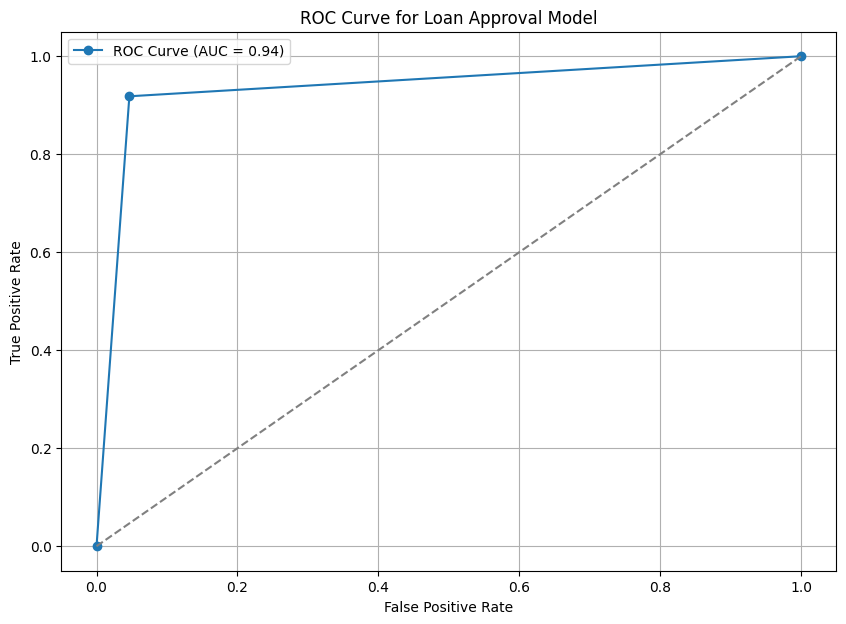

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_svc_pred)

# Compute AUC (Area Under the Curve)
auc_score = roc_auc_score(y_test,y_svc_pred)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, marker='o', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Loan Approval Model')
plt.legend()
plt.grid(True)
plt.show()

# **Regularization**

The Accuracy of the Decision tree and Random forest show 98%.
it seems to be showing that the model is overfitting,to reduce this
we can use regularization method.

Purpose: To add a penalty for complexity in the model, helping to prevent it from fitting the noise in the training data.

Apply Regularization



***Random forest:***

In [60]:
#Random Forest Parameters:

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10)
model.fit(x_train_scaled, y_train)


RandomForestClassifier(max_depth=10, min_samples_split=10)

In [61]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(x_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))
auc_score = roc_auc_score(y_test, model.predict_proba(x_test_scaled)[:, 1])
print("AUC Score:", auc_score)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       536
           1       0.98      0.95      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854

AUC Score: 0.9981049938984323


***Decision tree***

In [62]:
#Pruning and Regularization:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10)
dt_model.fit(x_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [66]:
from sklearn.metrics import classification_report, roc_auc_score

y_dt_pred = dt_model.predict(x_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_dt_pred))
auc_score = roc_auc_score(y_test, dt_model.predict_proba(x_test_scaled)[:, 1])
print("AUC Score:", auc_score)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       536
           1       0.94      0.97      0.96       318

    accuracy                           0.97       854
   macro avg       0.96      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854

AUC Score: 0.9890083779217121


# **Hyperparameter Tuning**

In [69]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the model
model = SVC()

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x_train_scaled, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params)
print(best_score)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.9484626647144948


# **Interpretation of Results (Conclusion)**

**1. Conclusion:**

1.Evaluate performance metrics to understand accuracy, precision, recall, and other relevant metrics.

2.Analyze feature importance to see which factors are most influential.

3.Assess bias and variance to ensure the model generalizes well.

4.Check model stability through cross-validation and testing on different data.

5.Draw actionable conclusions based on the model’s performance and business impact.

# **Summary**

1.Adjust the classification threshold to find a balance between precision and recall.

2.Tune hyperparameters to improve model performance.

3.Explore different models to see if they offer better precision-recall trade-offs.

4.Evaluate business costs associated with false positives and false negatives.

5.Monitor and adjust the model regularly based on performance and feedback.

# **Future Work**

**1.Enhance Data Quality and Collection**:
a.Expand Data Sources: Incorporate additional data sources such as alternative credit scoring models, transaction data, or social media data to enrich the dataset.
b.Improve Data Quality: Implement better data cleaning and preprocessing techniques to handle missing values, outliers, and inconsistencies.

**2. Model Improvement and Experimentation**:

a.Algorithm Exploration: Test and compare different machine learning algorithms beyond the initial model, such as Random Forests, neural networks.

b.Hyperparameter Tuning: Use more advanced hyperparameter tuning methods such as Bayesian optimization to find optimal settings for model parameters.

**3.Model Evaluation and Validation**:

a.Performance Metrics: Evaluate models using a variety of metrics such as Precision-Recall AUC, ROC-AUC, and confusion matrix to get a comprehensive view of performance.

**4. Integration and Deployment**:

a.Real-Time Prediction: Develop and integrate a real-time prediction system for loan approvals to improve decision-making efficiency.

b.Model Monitoring: Implement monitoring and alerting systems to track model performance over time and detect any drifts or degradations.

c.Scalability: Ensure the model and infrastructure can handle large volumes of data and transactions, especially if scaling up.

**5.Explore deep learning algorithms for potentially higher accuracy**.

**6.Update the model periodically with new data.**

**7.Consider adding more features to enhance predictive power.**